In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [93]:
weather = pd.read_csv("C:\\Users\\Kolade\\Documents\\Datasets\\weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [94]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [95]:
weather.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [96]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [97]:
weather.isnull().sum().sum()

343248

In [98]:
numeric_df = weather.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021

In [99]:
# import seaborn as sns
# sns.heatmap(weather.isnull(), cbar=False)
weather["Date"] = pd.to_datetime(weather["Date"])

In [100]:
weather.fillna({'WindDir9am':'Unknown',
                'WindDir3pm':'Unknown',
                'WindGustDir':'Unknown',
               'RainToday':'Unknown',
               'RainTomorrow':'Unknown'}, inplace=True)
# weather.head()

In [101]:
# pressure, both temp plot graph or model based
# Pressuer - median
# Temp - mean

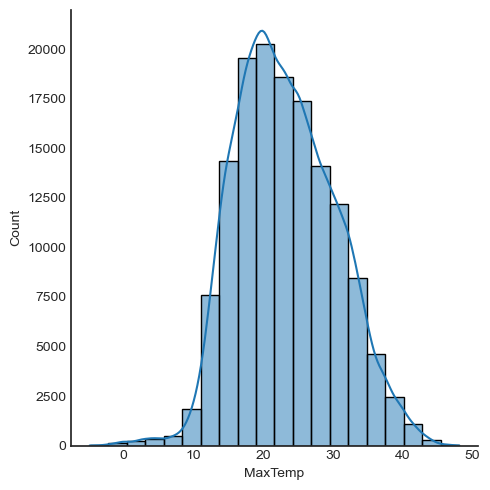

In [102]:
sns.displot(weather['MaxTemp'], kde=True, bins=20)
plt.show()
# MinTemp
# MaxTemp
# Rainfall
# Evaporation
# Sunshine
# WindGustDir 
# WindGustSpeed
# WindSpeed9am
# WindSpeed3pm
# Humidity9am
# Humidity3pm
# Pressure9am
# Pressure3pm
# Cloud9am
# Cloud3pm
# Temp9am
# Temp3pm

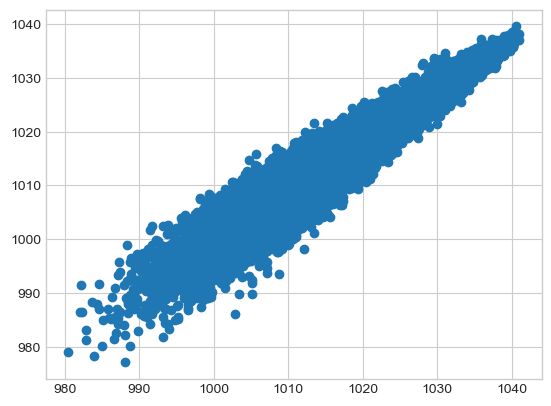

In [103]:
plt.style.use('seaborn-v0_8-whitegrid')

x = weather['Pressure9am']
y = weather['Pressure3pm']
plt.scatter(x, y);

<Axes: xlabel='RainTomorrow', ylabel='count'>

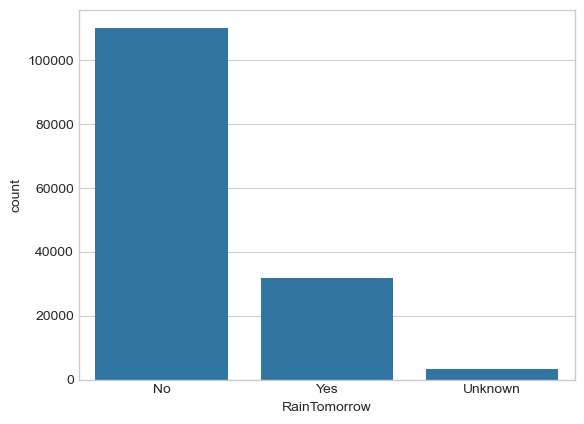

In [104]:
sns.countplot(x='RainTomorrow', data=weather)
# , hue='WindGustDir'
# Not balanced

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

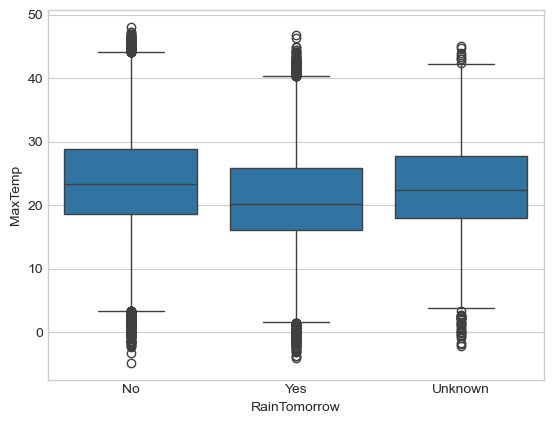

In [105]:
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=weather)

In [106]:
# sns.pairplot(weather, hue='RainTomorrow', diag_kind='kde')

In [107]:
# sns.regplot(x='MinTemp', y='MaxTemp', logistic=True, data=weather)

In [108]:
weather[['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm']] = weather[['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm']].fillna(0)

In [109]:
weather.fillna({
    'MinTemp': weather['MinTemp'].mean(),
    'MaxTemp': weather['MaxTemp'].mean(),
    'WindSpeed9am': weather['WindSpeed9am'].median(),
    'WindSpeed3pm': weather['WindSpeed3pm'].median(),
    'Humidity3pm': weather['Humidity3pm'].mean(),
    'Humidity9am': weather['Humidity9am'].median(),
    'Pressure9am': weather['Pressure9am'].median(),
    'Pressure3pm': weather['Pressure3pm'].median(),
    'Temp9am': weather['Temp9am'].mean(),
    'Temp3pm': weather['Temp3pm'].mean(),
}, inplace=True)

In [110]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

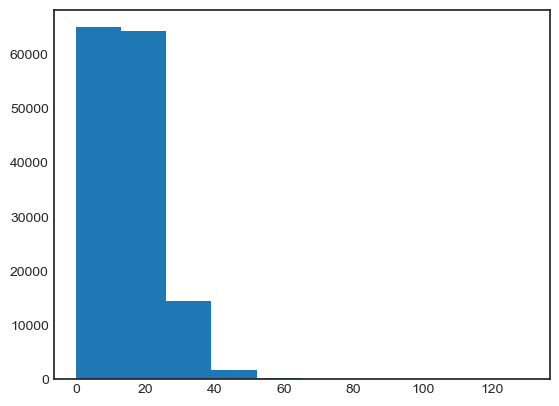

In [111]:
plt.style.use('seaborn-v0_8-white')
hdata = weather['WindSpeed9am']
# hdata
plt.hist(hdata);

In [112]:
weather.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.307990,3.107787,3.957069,37.210525,14.030751,18.669758,68.901251,51.539116,1017.644768,1015.250115,2.738677,2.669559,16.990631,21.683390
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,2011-01-11 00:00:00,7.700000,18.000000,0.000000,0.000000,0.000000,30.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,0.000000,0.000000,12.300000,16.700000
50%,2013-06-02 00:00:00,12.100000,22.700000,0.000000,1.600000,0.100000,37.000000,13.000000,19.000000,70.000000,51.539116,1017.600000,1015.200000,1.000000,1.000000,16.800000,21.400000
75%,2015-06-14 00:00:00,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000
std,NaN,6.365750,7.088124,8.389771,4.163070,4.680785,16.649265,8.861796,8.716716,18.855360,20.471189,6.728484,6.663994,3.132539,3.048519,6.449221,6.850057


In [113]:
# Q1 = weather['MinTemp'].quantile(0.25)
# Q3 = weather['MinTemp'].quantile(0.75)
# IQR = Q3 - Q1

# lower_level = Q1 - 1.5 * IQR
# upper_level = Q3 + 1.5 * IQR

# outliers = weather['MinTemp'][(weather['MinTemp'] < lower_level) | (weather['MinTemp'] > upper_level)]

# def indicies_of_outliers(x):
#     q1, q3 = np.percentile(x, [25, 75])
#     iqr = q3 - q1
#     lower_bound = q1 - (iqr * 1.5)
#     upper_bound = q3 + (iqr * 1.5)
#     return np.where((x > upper_bound) | (x < lower_bound))
# indicies_of_outliers(weather['Rainfall'])
# Q1 = weather['MaxTemp'].quantile(0.25)
# Q3 = weather['MaxTemp'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = weather[(weather['MaxTemp'] < lower_bound) | (weather['MaxTemp'] > upper_bound)]

In [118]:
from scipy.stats import zscore
# check
numeric_cols = weather.select_dtypes(include=['number']).columns
z_scores = weather[numeric_cols].apply(zscore)
# Flag outliers with z-score above a threshold (commonly 3 or -3)
filtered_df = weather[(z_scores.abs() <= 3)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           0 non-null       datetime64[ns]
 1   Location       0 non-null       object        
 2   MinTemp        145434 non-null  float64       
 3   MaxTemp        145114 non-null  float64       
 4   Rainfall       142978 non-null  float64       
 5   Evaporation    143883 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    0 non-null       object        
 8   WindGustSpeed  144871 non-null  float64       
 9   WindDir9am     0 non-null       object        
 10  WindDir3pm     0 non-null       object        
 11  WindSpeed9am   144098 non-null  float64       
 12  WindSpeed3pm   144502 non-null  float64       
 13  Humidity9am    144875 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [ ]:
weather.info()

In [ ]:
# Does not accept NaN values

# from sklearn.ensemble import IsolationForest
# # 
# clf = IsolationForest(contamination=0.05, random_state=42)
# weather['anomaly'] = clf.fit_predict(weather[['MinTemp', 'MaxTemp']])

# # Outliers are marked as -1
# outliers = weather[weather['anomaly'] == -1]
# outliers

In [ ]:
weather['WindDir3pm'].unique()
# dummies

In [71]:
df_dummies = pd.get_dummies(weather, columns=['Location','WindGustDir','WindDir9am','WindDir3pm'], prefix=['Location','WindGustDir','WindDir9am','WindDir3pm'], dtype=bool)
# df_dummies.head()
# df = pd.concat([df_dummies, weather], axis = 1)
# df_dummies.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)
df_dummies.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,0.189447,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,...,False,False,False,False,False,False,False,False,True,False
1,2008-12-02,-0.753101,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,...,False,False,False,False,False,False,False,False,False,True
2,2008-12-03,0.110901,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,-0.470337,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,0.833521,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,...,True,False,False,False,False,False,False,False,False,False


In [72]:
df_dummies['RainTomorrow'][0:20]

0          No
1          No
2          No
3          No
4          No
5          No
6          No
7          No
8         Yes
9          No
10        Yes
11        Yes
12        Yes
13         No
14    Unknown
15         No
16        Yes
17        Yes
18         No
19         No
Name: RainTomorrow, dtype: object

In [73]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 119 entries, Date to WindDir3pm_WSW
dtypes: bool(100), datetime64[ns](1), float64(16), object(2)
memory usage: 35.0+ MB


In [74]:
df_dummies['RainToday'] = df_dummies['RainToday'].str.strip().str.lower().map({'yes': True, 'no': False})
df_dummies['RainTomorrow'] = df_dummies['RainTomorrow'].str.strip().str.lower().map({'yes': True, 'no': False})
df_dummies['RainToday'] = df_dummies['RainToday'].astype(bool)
df_dummies['RainTomorrow'] = df_dummies['RainTomorrow'].astype(bool)

In [75]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 119 entries, Date to WindDir3pm_WSW
dtypes: bool(102), datetime64[ns](1), float64(16)
memory usage: 33.0 MB


In [76]:
df_dummies['Date'] = df_dummies['Date'].astype('int64')

In [77]:
df_dummies.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,1228089600000000000,0.189447,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,...,False,False,False,False,False,False,False,False,True,False
1,1228176000000000000,-0.753101,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,...,False,False,False,False,False,False,False,False,False,True
2,1228262400000000000,0.110901,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,...,False,False,False,False,False,False,False,False,False,True
3,1228348800000000000,-0.470337,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,...,False,False,False,False,False,False,False,False,False,False
4,1228435200000000000,0.833521,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,...,True,False,False,False,False,False,False,False,False,False


In [78]:
df_dummies = df_dummies.drop_duplicates()

In [79]:
# x_data = df_dummies.drop('RainTomorrow', axis=1)  
x_data = df_dummies[['Humidity3pm', 'Pressure3pm', 'Humidity9am', 'Pressure9am', 'WindGustSpeed','Temp3pm','Rainfall','Sunshine','MaxTemp','RainToday']]   
y_data = df_dummies['RainTomorrow']
x_data.shape

(145460, 10)

In [80]:
# Normalise
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x_data)

In [81]:
pca = PCA(n_components=3)  # choose number of components
x_pcad = pca.fit_transform(x_scaled)

In [83]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_pcad, y_data, random_state=1, train_size=0.7)

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=0)
model = DecisionTreeClassifier(random_state=0)
# model = LogisticRegressionCV(cv=3, random_state=0, max_iter=10000, c=0.2)
# model = LogisticRegression(random_state=0, max_iter=10000, C=0.2) 
# model = GaussianNB() 
model.fit(Xtrain, ytrain)
# importances = model.feature_importances_

# # Display feature importances
# feature_importances = pd.Series(importances, index=Xtrain.columns)
# print(feature_importances.sort_values(ascending=False)[0:11])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [89]:
y_model = model.predict(Xtest)

## Accuracy metrics

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.731105916861451

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(ytest, y_model))
print(classification_report(ytest, y_model))

[[27185  6062]
 [ 5672  4719]]
              precision    recall  f1-score   support

       False       0.83      0.82      0.82     33247
        True       0.44      0.45      0.45     10391

    accuracy                           0.73     43638
   macro avg       0.63      0.64      0.63     43638
weighted avg       0.73      0.73      0.73     43638



## Feature Selection

In [35]:
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(score_func=f_classif, k=5)
# X_new = selector.fit_transform(x_data, y_data)

# selected_mask = selector.get_support()
# selected_features = [name for mask, name in zip(selected_mask, x_data) if mask]
# print("Selected features:", selected_features)

In [ ]:
#  In short, feature selection no work
# select_k_best = SelectKBest(score_func=chi2, k=2)
# X_train_k_best = select_k_best.fit_transform(X_train, y_train)

# print("Selected features:", X_train.columns[select_k_best.get_support()])

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Train random forest and get feature importances
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# importances = model.feature_importances_

# # Display feature importances
# feature_importances = pd.Series(importances, index=X_train.columns)
# print(feature_importances.sort_values(ascending=False))

In [ ]:
# for i in range(len(model)):
#     cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
#     #extracting TN, FP, FN, TP
#     TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
#     print(cm)
#     print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
#     print()# Print a new 

# accuracy= r2_score(y_pred,y_test)
# print(accuracy)